# PYTHON PROGRAMMING


In [1]:
# 한글 찍기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## 실습 1. CCTV_in_Seoul.csv 파일을 pandas로 불러온다.


In [3]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv')

In [4]:
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


## 실습 2. 컬럼 중 "기관명" 컬럼명을 "구별" 로 이름을 바꾼다.

In [5]:
CCTV_Seoul = CCTV_Seoul.rename(columns={'기관명':'구별'})

CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [6]:
CCTV_Seoul.isna().sum()  # Nan 데이터가 없음을 확인

구별           0
소계           0
2013년도 이전    0
2014년        0
2015년        0
2016년        0
dtype: int64

In [7]:
CCTV_Seoul.shape

(25, 6)

## 실습 3. population_in_Seoul.xls 파일을 읽어온다. 


#### 엑셀 컬럼부분은 엑셀에서 수정해서 csv 로 내보내기 하는게 낫다

##### pd.read_excel('population.xlr')

## 실습 4.population_in_Seoul.xls 파일을 읽어온다.
### 단, header 는 3번째 row 로 사용할 것. 따라서 header = 2  로 셋팅한다.
### 엑셀파일의 컬럼은  B, D, G, J, N 만 사용할 것.


In [37]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls',
                         header=2,
                         usecols='B, D, G, J, N')  # 문자열로

In [38]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 실습 5-1. pop_Seoul 의 컬럼명을 모두 출력한다.

In [39]:
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

## 실습 5-2. 컬럼명을 다음으로 바꾼다.
### 0번째는 '구별' , 1번째는 '인구수', 2번쨰는 '한국인', 3번째는 '외국인', 4번째는 '고령자'  로 rename

In [40]:
pop_Seoul = pop_Seoul.rename(columns={'자치구':'구별','계':'인구수','계.1':'한국인','계.2':'외국인','65세이상고령자':'고령자'})

In [41]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


#### sol2) 참고용

In [42]:
pop_Seoul.columns = [ '구별','인구수','한국인','외국인','고령자']

## 실습 6. CCTV 갯수가 가장 많은 순부터 적은 순으로 정렬한 후, 상위 20개를 화면에 보인다.

In [8]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [44]:
CCTV_Seoul = CCTV_Seoul.sort_values(by=['소계'], ascending=False)

In [45]:
CCTV_Seoul.head(20)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


## 실습 7. 최근 3년간 CCTV 증가율을 계산하여, dataframe 에 '최근증가율' 컬럼을 추가한다.
### 증가율 계산  :  (2016 + 2015 + 2014) / 2013이전 * 100

In [46]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']*100
CCTV_Seoul.head(20)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374
6,구로구,1561,1142,173,246,323,64.973730
4,관악구,1496,846,260,390,613,149.290780
16,성북구,1464,1009,78,360,204,63.627354
10,동대문구,1294,1070,23,198,579,74.766355
8,노원구,1265,542,57,451,516,188.929889


## 실습 8. 최근 3년간 CCTV 증가율이 가장 높은 순으로 5개의 구를 찾는다.

In [47]:
CCTV_Seoul.sort_values(by = '최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 실습 9. 서울시의 인구 데이터 중, NaN이 있는지 확인하고, NaN이 있으면 해당 row를 삭제한다.

In [ ]:
pop_Seoul.isna().sum()

In [ ]:
pop_Seoul = pop_Seoul.dropna(axis=0) # 빅데이터분석기사 실기

In [ ]:
pop_Seoul.head(3)

## 실습 10. '외국인비율' 과 '고령자비율' 두개의 컬럼을 추가한다.
### 외국인비율 = 외국인 수 / 인구수 * 100
### 고령자비율 = 고령자 수 / 인구수 * 100

In [ ]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] *100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] *100
pop_Seoul.head(3)

In [ ]:
pop_Seoul

## 실습 11. 외국인 대상으로 장사를 할 경우.
## 외국인이 가장 많은 구와, 외국인비율이 가장 높은 구를 각각 5개씩 찾는다.

In [ ]:
pop_Seoul.loc[ pop_Seoul['외국인'] == pop_Seoul['외국인'].max(), ]

In [ ]:
pop_Seoul.loc[ pop_Seoul['외국인비율'] == pop_Seoul['외국인비율'].max(), ]

## 실습 12. 고령자 대상 마케팅을 구상 중일 경우.
## 고령자가 가장 많은 구와, 고령자비율이 가장 높은 구를 각각 5개씩 찾는다.

In [ ]:
pop_Seoul.sort_values(by='고령자',ascending= False).head(5)

In [ ]:
pop_Seoul.sort_values(by='고령자비율',ascending= False).head(5)

## 실습 13. CCTV 데이터와 인구 데이터 합치고 분석하기

In [ ]:
CCTV_Seoul.head(2)

In [ ]:
pop_Seoul.head(2)

In [ ]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul, on='구별')
data_result

## 실습 14. data_result 에서, 다음 4개의 컬럼을 모두 버린다.
### '2013년도 이전', 2014년', '2015년', '2016년' 

In [ ]:
data_result.drop(['2013년도 이전','2014년','2015년','2016년'], axis=1, inplace=True)

## 실습 15-1. dara_result 의 인덱스를, '구별' 로 바꾼다.

In [ ]:
data_result.set_index('구별', inplace=True)

In [ ]:
data_result.head(3)

In [ ]:
# 관악구의 인구수 구하기?

In [ ]:
data_result.loc['관악구', '인구수']

## 실습 15-2. 이 데이터프레임을 csv 파일로 저장합니다.
### 파일명은 CCTV_result.csv

In [123]:
data_result.to_csv('CCTV_result.csv', sep=',')

In [50]:
data_result = pd.read_csv('CCTV_result.csv')

## 실습 16. 상관 관계 분석.
### https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
###  상관계수는 -1부터 1까지의 값을 갖는다. 1일 때 완벽한 양의 상관관계가 되고, -1일 때 완벽한 음의 상관관계가 된다. 0이라면 별다른 상관관계가 없음을 의미한다.
###  상관계수가 0.1 이하면 관계가 없고, 0.3 이하면 약한관계 이다.

In [124]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


## 실습 17. CCTV의 갯수와 고령자 비율의 상관관계를 분석한다.

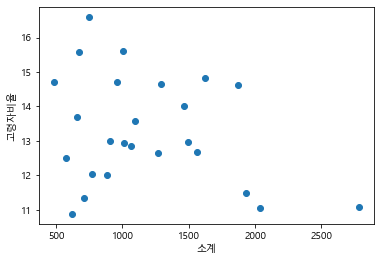

In [55]:
plt.scatter(data = data_result, x ='소계', y = '고령자비율')
plt.xlabel('소계')
plt.ylabel('고령자비율')
plt. show()

In [125]:
data_result[ ['소계', '고령자비율'] ].corr()

,소계,고령자비율
소계,1.000000,-0.280786
고령자비율,-0.280786,1.000000


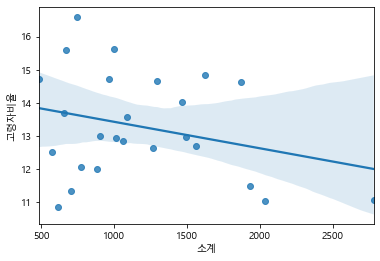

In [56]:
sb.regplot(data = data_result, x = '소계', y = '고령자비율')
plt.show()

## 실습 18. CCTV의 갯수와 외국인 비율의 상관관계를 분석한다.

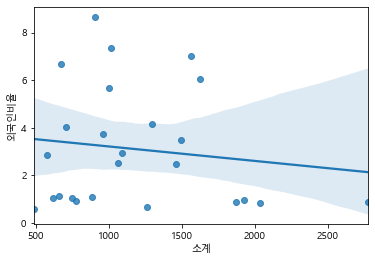

In [57]:
sb.regplot(data = data_result, x = '소계', y = '외국인비율')
plt.show()
#수평일수록 관계x

In [126]:
data_result[ ['소계', '외국인비율'] ].corr()

,소계,외국인비율
소계,1.000000,-0.136074
외국인비율,-0.136074,1.000000


## 실습 19. CCTV의 갯수와 인구수의 상관관계를 분석한다.

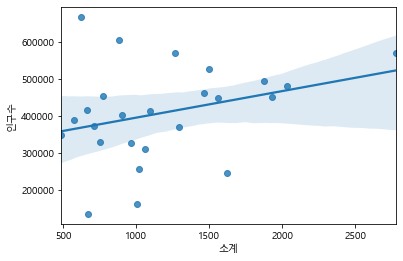

In [58]:
sb.regplot(data = data_result, x = '소계', y = '인구수')
plt.show()

In [127]:
data_result[ ['소계', '인구수'] ].corr()

,소계,인구수
소계,1.000000,0.306342
인구수,0.306342,1.000000


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 실습 20. 각 구의 CCTV의 갯수를 bar로 나타낸다.
### pandas dataframe.plot 함수 사용

In [62]:
data_result.set_index('구별', inplace=True)

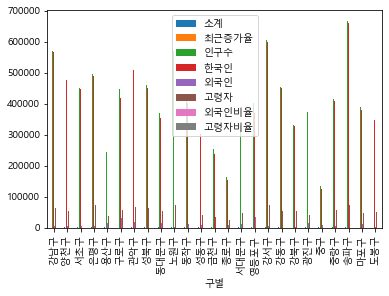

In [63]:
data_result.plot(kind = 'bar')
plt.show()

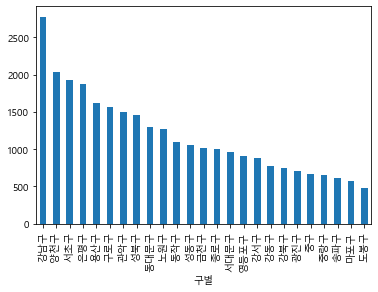

In [66]:
data_result['소계'].plot(kind = 'bar')
plt.show()

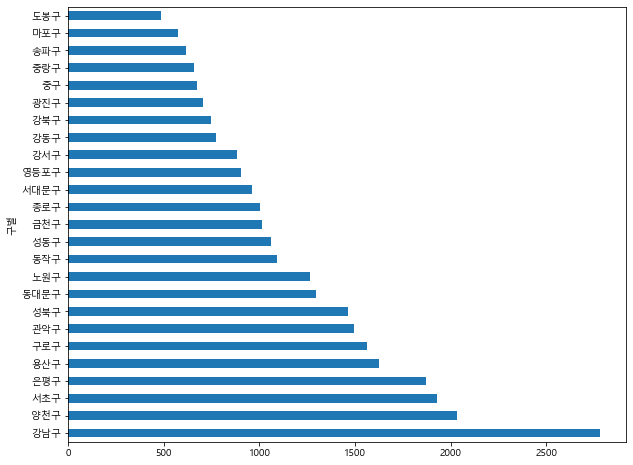

In [67]:
# y 축이 x부분으로 오게 하려면
plt.figure(figsize=(10,8))
data_result['소계'].plot(kind = 'barh')
plt.show()

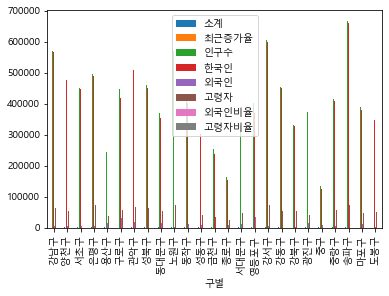

In [130]:
data_result.plot.bar()
plt.show()

In [51]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
2,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
3,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
4,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## 실습 21. 각 구의 CCTV의 갯수를, 먼저 소팅(큰순)한 후,  bar로 나타낸다.

In [132]:
data_result.sort_values(by ='소계', ascending=False, inplace=True)

# data_result.sort_values(by ='소계', ascending=False)['소계'].plot(kind = 'bar')

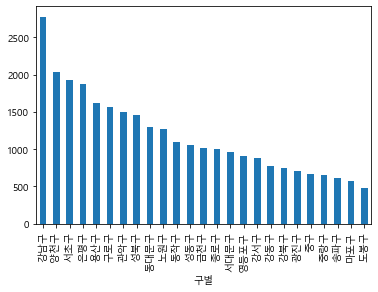

In [68]:
data_result['소계'].plot(kind = 'bar')
plt.show()

## 실습 22. 인구 한명당 CCTV의 비율을 계산하고, 이를 각 구별로 CCTV비율이 얼마인지 bar로 나타낸다

In [74]:
data_result['비율'] =  data_result['소계']/data_result['인구수']
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.004873
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.004238
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.004286


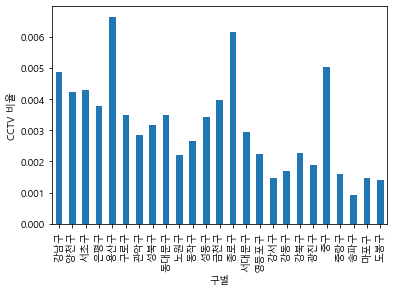

In [75]:
data_result['비율'].plot.bar()

plt.ylabel('CCTV 비율')
plt.show()

## 실습 23. 인구수와 CCTV갯수가 어떤 분포인지, scatter로 나타낸다.

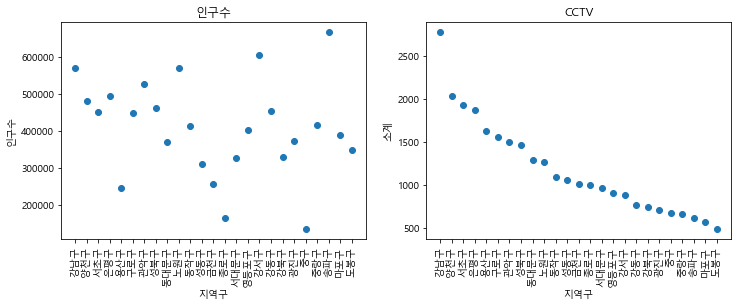

In [141]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(data = data_result, x=data_result.index , y= '인구수')
plt.title('인구수')
plt.xlabel('지역구')
plt.ylabel('인구수')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.scatter(data = data_result, x=data_result.index , y= '소계')
plt.title('CCTV')
plt.xlabel('지역구')
plt.ylabel('소계')
plt.xticks(rotation=90)

plt.show()